# Проектная работа. Отток клиентов банка.

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## 1. Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

#models
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

#preprocess
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

# метрики
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [ ]:
# грузим данные
try:
    data = pd.read_csv("G:/Projects/praktikum/datasets/Churn.csv")
except:
    data = pd.read_csv('/datasets/Churn.csv')

Описание данных датасета:

Признаки
* RowNumber — индекс строки в данных
* CustomerId — уникальный идентификатор клиента
* Surname — фамилия
* CreditScore — кредитный рейтинг
* Geography — страна проживания
* Gender — пол
* Age — возраст
* Tenure — количество недвижимости у клиента
* Balance — баланс на счёте
* NumOfProducts — количество продуктов банка, используемых клиентом
* HasCrCard — наличие кредитной карты
* IsActiveMember — активность клиента
* EstimatedSalary — предполагаемая зарплата

Целевой признак
* Exited — факт ухода клиента

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0



Перед обучением моделей надо подготовить данные:
\\\\* Столбцы RowNumber, CustomerID, Surname - бесполезны для нашей задачи. Их мы уберём.
* Ст
олбцы Geography и Gender содержат категориальные признаки, их мы закодируем OHE.
* В столбце Tenure есть пропуски. Терять 900 строчек жалко - заменим пропуски нулями (недвижимость отсутствует).

In [5]:
# отбросим ненужные столбцы
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [6]:
# перекодируем категории
data = pd.get_dummies(data, drop_first=True)

In [7]:
# заполним пропуски нулями
data = data.fillna(0)

In [8]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


Теперь посмотрим на сами данные. Сразу на гистограммах.

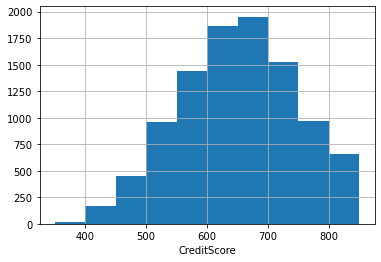

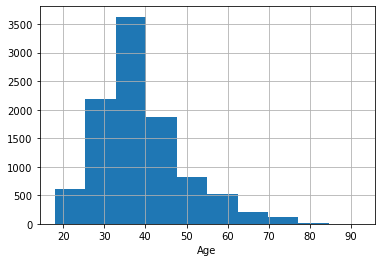

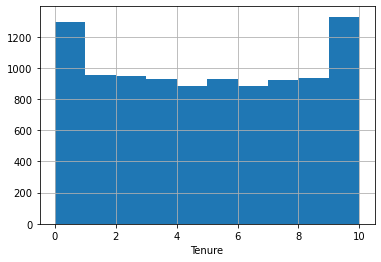

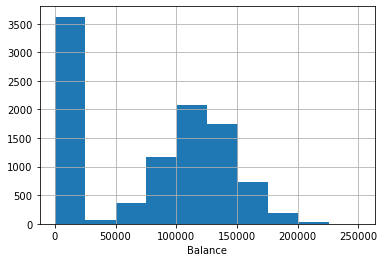

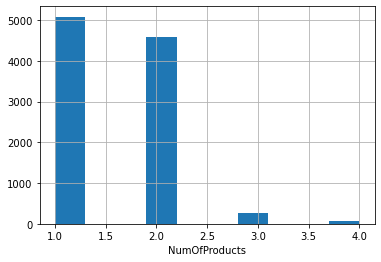

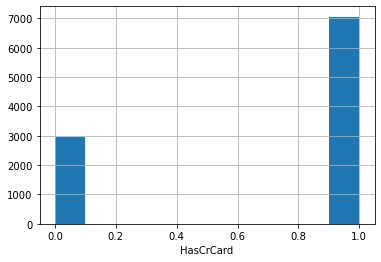

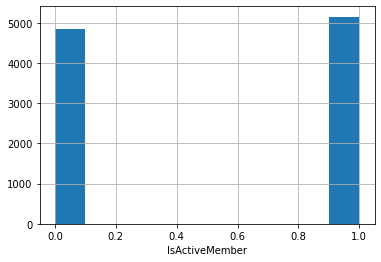

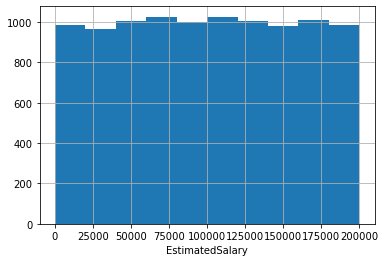

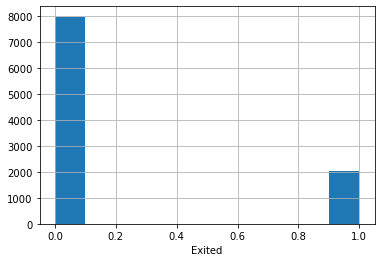

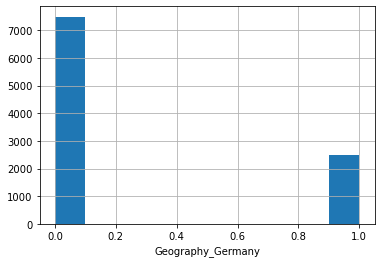

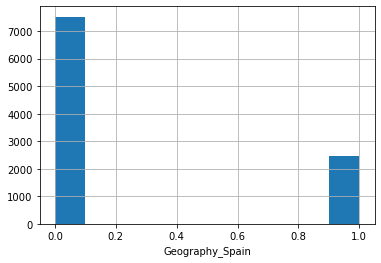

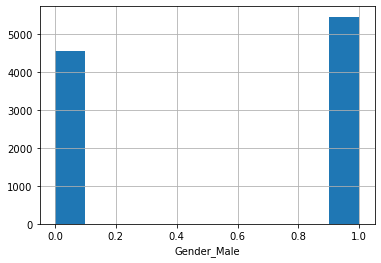

In [9]:
for each in data.columns:
    data[each].hist()
    plt.xlabel(each)
    plt.show()

В целом данные выглядят неплохо. Единственное - в данных о балансе ('Balance') много нулевых значений. 

С точки зрения целевых признаков (Exited), соотношение классов 1 к 4 (положительных меньше), т.е. точность константной модели с одними нулями будет равна 0.75.

Пока поработаем без учёта дисбаланса.

# 2. Модели без учёта дисбаланса классов

In [10]:
# функция для теста. На вход - модель, на выходе метрики и ROC-график
def test_me(cur_model):    
    probabilities_test = cur_model.predict_proba(features_test)
    probabilities_one_test = probabilities_test[:, 1]
    fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
    
    # F1 score
    predictions = cur_model.predict(features_test)
    print('F1_Score=',f1_score(target_test, predictions))
    
    #график
    plt.figure()
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-кривая')
            
    # AUC-ROC SCORE
    auc_roc = roc_auc_score(target_test, probabilities_one_test)
    print('ROC-AUC Score=', auc_roc)
    
    plt.show()    

In [11]:
# функция для скоринга. На вход - модель, на выходе метрики и ROC-график
def score_me(cur_model):    
    probabilities_valid = cur_model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
    
    # Scores
    predictions = cur_model.predict(features_valid)
    print('Recall=',recall_score(target_valid, predictions))
    print('Precision=',precision_score(target_valid, predictions))
    print('F1_Score=',f1_score(target_valid, predictions))
        
    #график
    plt.figure()
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-кривая')
            
    # AUC-ROC SCORE
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    print('ROC-AUC Score=', auc_roc)
    
    plt.show()    

## 2.1 Разбивка на выборки и подготовка признаков

Разделим исходные данные на обучающую, валидационную и тестовую выборки.

Обучающая - 60%
Валидационная - 20%
Тестовая - 20%

In [12]:
# сначала отрежем обучающую выборку (data_train)
data_train, data_non_train = train_test_split(data, test_size=0.4, random_state=112211)

# теперь нарежем пополам отстатки на вылидационную (data_valid) и тестовую (data_test)
data_valid, data_test = train_test_split(data_non_train, test_size=0.5, random_state=112211)

In [13]:
# это для обучающей выборки
features = data_train.drop(['Exited'], axis=1)
target = data_train['Exited']

# это для валидационной
features_valid = data_valid.drop(['Exited'], axis=1)
target_valid = data_valid['Exited']

# это для тестовой
features_test = data_test.drop(['Exited'], axis=1)
target_test = data_test['Exited']

Масштабируем численные признаки через StandardScaler.

In [14]:
numeric_cols = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Tenure', 'NumOfProducts']
scaler = StandardScaler()
scaler.fit(features[numeric_cols])

features[numeric_cols] = scaler.transform(features[numeric_cols])
features_valid[numeric_cols] = scaler.transform(features_valid[numeric_cols])
features_test[numeric_cols] = scaler.transform(features_test[numeric_cols]) 

In [15]:
features.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
1556,2.051912,-0.950764,1.759294,-1.217525,0.811958,1,1,-0.101908,0,1,0
9464,0.917355,0.000968,1.438363,-1.217525,0.811958,1,0,-1.427438,0,0,1
9033,1.598089,-0.474898,-0.808160,0.325004,0.811958,1,0,0.753509,1,0,1
1350,0.680129,0.191314,-0.487228,0.960355,-0.911944,1,1,0.053643,0,0,0
8577,1.061753,2.475471,-1.129091,0.967245,-0.911944,1,1,0.365453,1,0,1


Данные готовы, переходим к обучению!

## 2.2 DecisionTreeClassifier

Посмотрим как справится дерево. Прогоним разные параметры через функцию и посмотрим с какими удастся получить максимальное значение F1_score.

In [16]:
def tree_research(features_res, target_res):
    # переберём параметры дерева для нахождения оптимальных
    df = pd.DataFrame()
    for depth in range(1,30):
            for leaf in range(2,20):
                model = DecisionTreeClassifier(random_state=112211, max_depth=depth, min_samples_leaf=leaf)
                model.fit(features_res, target_res)
                predictions = model.predict(features_valid)

                scores = {'max_depth':depth, 'min_samples_leaf':leaf, 'f1_score':f1_score(target_valid, predictions)}
                df = df.append(scores, ignore_index=True)
    print(df.sort_values(by='f1_score', ascending=False).head())

In [17]:
tree_research(features, target)

G:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
G:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
G:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
G:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
G:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to

     f1_score  max_depth  min_samples_leaf
230  0.591093       13.0              16.0
124  0.590449        7.0              18.0
302  0.590296       17.0              16.0
122  0.590116        7.0              16.0
106  0.589474        6.0              18.0


Recall= 0.522673031026253
Precision= 0.6801242236024845
F1_Score= 0.5910931174089068
ROC-AUC Score= 0.8030301657963979


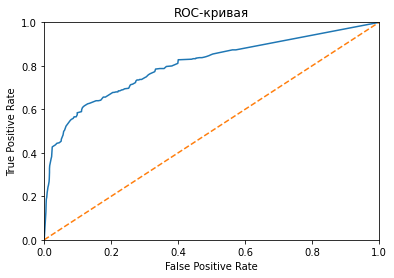

In [18]:
# Обучим модель на полученных параметрах и посмотрим метрики
model_tree = DecisionTreeClassifier(random_state=112211, max_depth=13, min_samples_leaf=16)
model_tree.fit(features,target)

score_me(model_tree)

F1_Score= 0.5541125541125541
ROC-AUC Score= 0.811272009370513


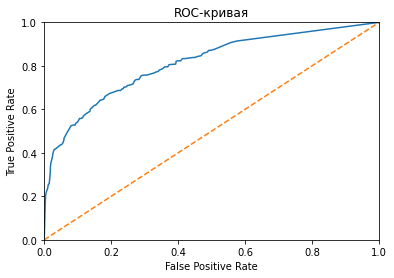

In [19]:
# посмотрим на тестовой выборке
test_me(model_tree)

Хотя F1_score модели дерева достиг 0.59, общий результат так себе... Precision_score модели 0.68, ниже точности константной модели для несбалансированных классов!

## 2.3 RandomForest

Теперь модель случайного леса.

In [20]:
# теперь лес. Также посмотрим на результаты перебором параметров.
def forest_research(features_res, target_res):
    forest_result_df = pd.DataFrame()
    for est in range(5,50,5):
        for feat in range(2,12):
            for depth in range(2,30,2):
                model = RandomForestClassifier(n_estimators=est, max_depth=depth, max_features=feat, random_state=112211)
                model.fit(features_res, target_res)

                predictions = model.predict(features_valid)
                score = {'estimators':est, 'max_depth':depth, 'max_features':feat, 'f1_score':f1_score(target_valid, predictions)}

                # Результаты в отдельный датафрейм сохраним
                forest_result_df = forest_result_df.append(score, ignore_index=True)
    print(forest_result_df.sort_values(by='f1_score', ascending=False).head(10))

In [21]:
forest_research(features, target)

G:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
G:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


      estimators  f1_score  max_depth  max_features
1185        45.0  0.628895       20.0           6.0
1186        45.0  0.621969       22.0           6.0
1045        40.0  0.621777       20.0           6.0
582         25.0  0.619883       18.0           3.0
662         25.0  0.618705       10.0           9.0
381         15.0  0.617910        8.0           9.0
494         20.0  0.617862       10.0           7.0
664         25.0  0.617564       14.0           9.0
1082        40.0  0.617391       10.0           9.0
1222        45.0  0.617391       10.0           9.0


Выглядит неплохо! Потестим модель с топовыми параметрами.

In [22]:
forest_model = RandomForestClassifier(n_estimators=45, max_depth=20, max_features=6, random_state=112211)
forest_model.fit(features, target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features=6, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=45,
                       n_jobs=None, oob_score=False, random_state=112211,
                       verbose=0, warm_start=False)

Recall= 0.5298329355608592
Precision= 0.7735191637630662
F1_Score= 0.6288951841359773
ROC-AUC Score= 0.8508813641708899


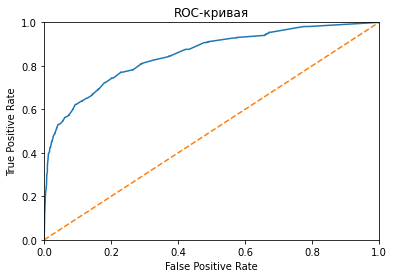

In [23]:
score_me(forest_model)

F1_Score= 0.5895953757225434
ROC-AUC Score= 0.8384334303131061


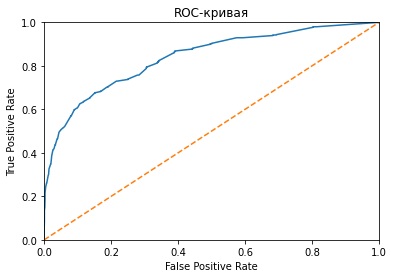

In [24]:
test_me(forest_model)

Достаточно перспективная модель!
Полнота выше 50%. А точность 77.3% - выше, чем у константной!

Вот только на тестовой выборке показатели снизились:( Какой облом!

## 2.4 Logistic Regression

Для регресии параметры мы оставим по умолчанию, посмотрим сколько она выдаст.

Recall= 0.2171837708830549
Precision= 0.6642335766423357
F1_Score= 0.3273381294964029
ROC-AUC Score= 0.7872090864215422


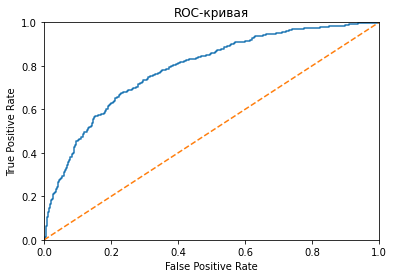

In [25]:
model_regres = LogisticRegression(random_state=112211, solver='liblinear')
model_regres.fit(features, target)

score_me(model_regres)

F1_Score= 0.30965391621129323
ROC-AUC Score= 0.7537768583591525


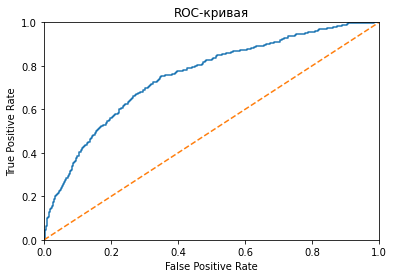

In [26]:
test_me(model_regres)

Мде... У регрессии "из коробки" совсем плохо с предсказаниями. При дисбалансе классов ей тяжело.

## Выводы

Были изучены различные модели с варируемыми параметрами - TreeClassifier, RandomForestClassifier и LogisticRegression. Модели обучались без учёта дисбаланса целевых классов. 

Для каждой модели были установлены параметры для максимальных значений метрики F1_score и проведено тестирование.
Полученные результаты:
* DecisionTreeClassifier, F1 = 0.554
* RandomForestClassifier, F1 = 0.589
* LogisticRegression, F1 = 0.309

Для улучшения качества моделей, проведём обучение с учётом дисбаланса.

## 3. Обучение с балансировкой классов

Так как в исходных данных баланс целевых признаков 1:4, попробуем сделать upsampling положительных классов в 3 раза. Таким образом получим более сбалансированный набор.

In [27]:
def upsample(features_df, target_df, repeat):
    features_zeros = features_df[target_df == 0]
    features_ones = features_df[target_df == 1]
    target_zeros = target_df[target_df == 0]
    target_ones = target_df[target_df == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=11111)
    
    return features_upsampled, target_upsampled

In [28]:
# создаем новый набор данных для обучения
features_upsamp, target_upsamp = upsample(features, target, 3)
target_upsamp.value_counts()

0    4778
1    3666
Name: Exited, dtype: int64

Теперь вновь потестируем модели, но с обучением на увеличенной и балансированной выборке. 

### 3.1 DecisionTreeClassifier

In [29]:
# вот и функция
tree_research(features_upsamp, target_upsamp)

     f1_score  max_depth  min_samples_leaf
122  0.595657        7.0              16.0
121  0.594427        7.0              15.0
119  0.593361        7.0              13.0
120  0.593361        7.0              14.0
123  0.590535        7.0              17.0


Recall= 0.6873508353221957
Precision= 0.5255474452554745
F1_Score= 0.5956566701137539
ROC-AUC Score= 0.8381450971334721


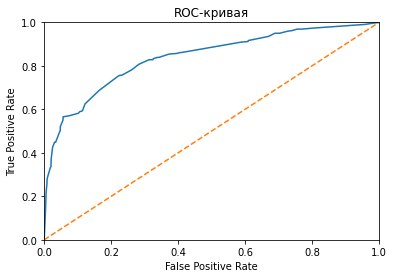

In [30]:
# Обучим модель на полученных параметрах и посмотрим метрики
model_tree = DecisionTreeClassifier(random_state=112211, max_depth=7, min_samples_leaf=16)
model_tree.fit(features_upsamp,target_upsamp)

score_me(model_tree)

F1_Score= 0.566735112936345
ROC-AUC Score= 0.8337332174613971


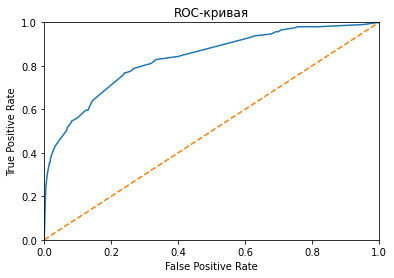

In [31]:
test_me(model_tree)

Качество модели дерева после увеличения положительных целевых признаков улучшилось. Хорошо!

Теперь посмотрим на модель случайного леса.

### 3.2 RandomForestClassifier

In [32]:
forest_research(features_upsamp, target_upsamp)

      estimators  f1_score  max_depth  max_features
590         25.0  0.671378        6.0           4.0
450         20.0  0.666667        6.0           4.0
730         30.0  0.665116        6.0           4.0
437         20.0  0.665072        8.0           3.0
297         15.0  0.664303        8.0           3.0
1010        40.0  0.663594        6.0           4.0
717         30.0  0.662722        8.0           3.0
1150        45.0  0.661253        6.0           4.0
858         35.0  0.660310       10.0           3.0
998         40.0  0.659524       10.0           3.0


In [33]:
# построим модель на параметрах
forest_model = RandomForestClassifier(n_estimators=25, max_depth=6, max_features=4, random_state=112211)
forest_model.fit(features_upsamp, target_upsamp)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=6, max_features=4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25,
                       n_jobs=None, oob_score=False, random_state=112211,
                       verbose=0, warm_start=False)

Recall= 0.6801909307875895
Precision= 0.6627906976744186
F1_Score= 0.6713780918727914
ROC-AUC Score= 0.8673862800952238


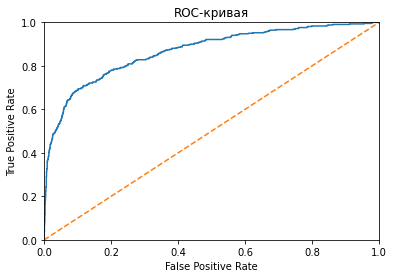

In [34]:
score_me(forest_model)

F1_Score= 0.6144859813084111
ROC-AUC Score= 0.8514501309856672


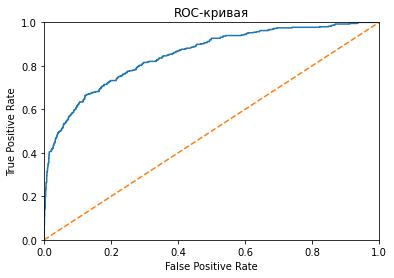

In [35]:
test_me(forest_model)

In [36]:
forest_model.score(features_test, target_test)

0.835

О, да у нас тут чемпион! Неплохие показатели по всем метрикам!

Но посмотрим на регрессию.

### 3.3 LogisticRegression

Для логистической регрессии попробуем два способа балансировки классов:
1. Обучение на расширенной выборке.
2. Изменение параметра class_weight модели.

Recall= 0.5990453460620525
Precision= 0.46741154562383613
F1_Score= 0.5251046025104602
ROC-AUC Score= 0.788773004004897


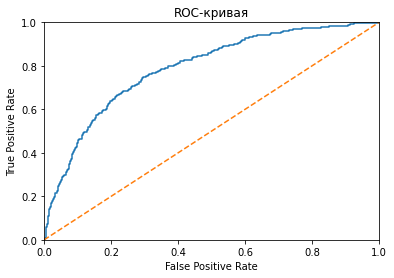

In [37]:
# обучим модель на выборке upsample
model_regres = LogisticRegression(random_state=112211, solver='liblinear')
model_regres.fit(features_upsamp, target_upsamp)

score_me(model_regres)

Качество лучше, чем было. Посмотрим как влияет параметр class_weight.

Recall= 0.7040572792362768
Precision= 0.41725601131541723
F1_Score= 0.5239786856127886
ROC-AUC Score= 0.7888832028307512


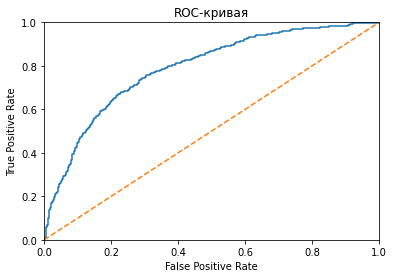

In [38]:
#обучим на старой выборке
model_regres = LogisticRegression(random_state=112211, class_weight='balanced', solver='liblinear')
model_regres.fit(features, target)

score_me(model_regres)

F1_Score= 0.4827586206896552
ROC-AUC Score= 0.7565303911937329


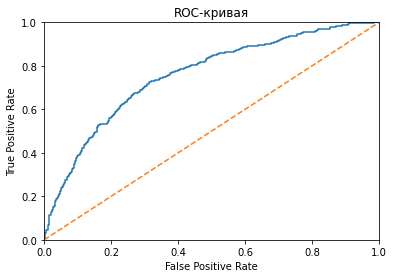

In [39]:
test_me(model_regres)

Балансировка параметром class_weight увеличило полноту, но уменьшило точность предсказаний. Метрика F1 при этом практически одинаковая. Наверно, это максимум что может здесь выдать регрессия.

### 3.4 Выводы

Для балансировки классов был применён upsampling положительных целевых признаков. После чего, было вновь проведено исследование различных моделей, обученных уже на увеличенной выборке.

Для всех типов моделей качество было улучшено.
Результаты тестирования:
* DecisionTreeClassifier, F1 = 0.566
* RandomForestClassifier, F1 = 0.614
* LogisticRegression, F1 = 0.482

# 4. Выводы

Входными данными была информация о клиентах банках, их счетах и имуществе. Целевой признак - информация об уходе клиента.

Цель работы - выбор оптимальной модели для прогнозирования ухода клиента из Банка.

Данные были предварительно проанализированы и обработаны:
* Были обработаны обнаруженные пропуски
* Выбраны значимые для обучения моделей признаки
* Категориальные признаки закодированы (OHE)
* Численные признаки масштабированы

Выборка была разделена на обучающую(60%), валидационную(20%) и тестовую(20%).

Обнаружено, что классы целевого признака несбалансированны(1:4). 
Далее было проведено исследование обучения моделей различных типов на обучающей выборке с несбалансированными классами целевых признаков. Качество моделей получилось ожидаемо невысоким.

Для балансировки классов был проведён upsampling обучающей выборки. После чего исследование моделей было повторено.
Результаты F1-метрики разных моделей на балансированной обучающей выборке:
* DecisionTreeClassifier, F1 = 0.566
* RandomForestClassifier, F1 = 0.614
* LogisticRegression, F1 = 0.482

Таким образом, для целей проектной работы можно рекомендовать использование модели RandomForestClassifier(F1_score = 0.614).